In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 14})

# Evaluation of FinalConfig Simulation Run

## 1. Number of runs
Comparison of one single REMC with largest cluster against all clustering including all runs. At threshold $3.5 A$ and cluster $1$.

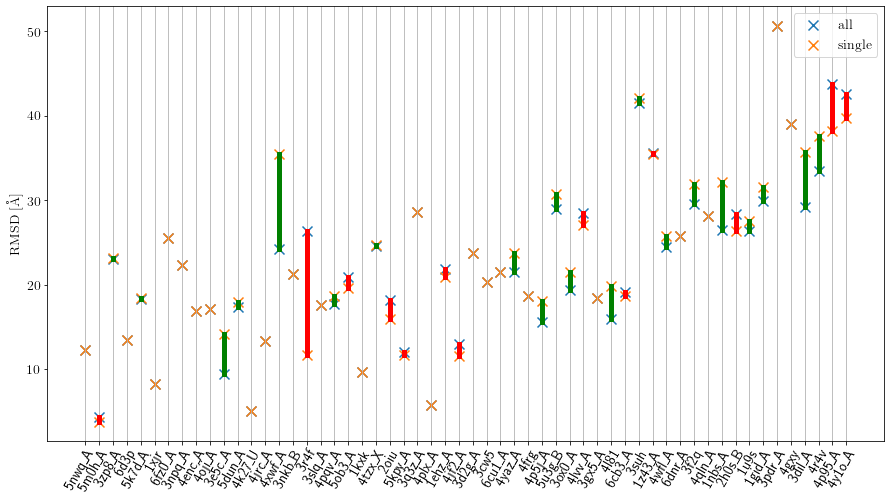

In [7]:
df = pd.read_csv("results.csv", index_col=0)
ev1 = df[(df["threshold"] == 3.5) & (df["cluster"] == 1)]

fig, ax = plt.subplots(figsize=(15, 8))

for name, group_RNA in ev1.sort_values(by="size").groupby("RNA", sort=False):
    single = float(group_RNA[group_RNA["Clustering File"] == "singleA"].RMSD)
    all = float(group_RNA[group_RNA["Clustering File"] == "allA"].RMSD)
    diff = single - all
    c = "green" if diff > 0 else "red"
    ax.plot((name, name),(single, all), linewidth=5, color=c)

ax.scatter(ev1[ev1["Clustering File"] == "allA"].RNA, ev1[ev1["Clustering File"] == "allA"].RMSD, label=r"$\mathrm{all}$", marker="x", s=100)
ax.scatter(ev1[ev1["Clustering File"] == "singleA"].RNA, ev1[ev1["Clustering File"] == "singleA"].RMSD, label=r"$\mathrm{single}$", marker="x", s=100)




ax.legend()
ax.grid(axis="x")
ax.set_ylabel(r"$\mathrm{RMSD\ [\AA]}$")


plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

plt.show()

In [6]:
ev1

,RNA,Clustering File,threshold,cluster,configuration,RMSD,size
183,3npq_A,allA,3.5,1,1,22.308344,51
201,3npq_A,singleB,3.5,1,1,22.174278,51
236,3npq_A,allB,3.5,1,1,22.385775,51
259,3npq_A,singleA,3.5,1,1,22.308344,51
534,2h0s_B,allA,3.5,1,1,28.399905,123
...,...,...,...,...,...,...,...
18685,3pdr_A,singleA,3.5,1,1,50.608078,161
18973,4y1o_A,allA,3.5,1,1,42.583655,258
18997,4y1o_A,singleB,3.5,1,1,39.548064,258
19038,4y1o_A,allB,3.5,1,1,40.934747,258
